<a href="https://colab.research.google.com/github/OnkarMate06/OnkarMate06/blob/main/Capital_Asset_Pricing_Model_(CAPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import csv file into dataframe 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stocks_dataset.csv')
df

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,251.960007,36.389999,498.619995,162.270004,29.620001,16.320000,1485.000000,3294.610107
1695,8/4/2020,249.830002,36.349998,509.640015,165.070007,30.010000,16.719999,1487.000000,3306.510010
1696,8/5/2020,249.119995,36.790001,502.109985,174.279999,29.850000,16.719999,1485.020020,3327.770020
1697,8/6/2020,265.279999,37.689999,509.079987,172.199997,29.840000,18.459999,1489.579956,3349.159912


In [ ]:
# grtting information about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [ ]:
# Here we have cleaned data which means it does not have any null value 
# setting index by date coulmn to simply further analysis 
df.set_index('Date',inplace=True)

In [ ]:
# getting description about overall dataframe like mean, count, min, max
df.describe()


,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,135.966863,31.296698,195.423654,218.325633,35.296986,25.720865,311.299388,2413.219428
std,50.062473,11.508628,127.700712,98.968191,3.412142,5.200605,203.097452,424.825240
min,44.820000,14.010000,44.887142,95.010002,26.770000,7.140000,120.500000,1741.890015
25%,88.080002,19.600001,90.474998,132.840004,32.790001,21.935001,218.829994,2053.294921
50%,136.759995,31.610001,143.830002,158.289993,34.900002,25.879999,253.740005,2360.159912
75%,178.075005,38.229999,320.024993,334.360001,38.004999,29.250000,323.565002,2783.330078
max,268.440002,73.309998,548.729980,440.619995,43.470001,38.029999,1643.000000,3386.149902


# normalize price wrt to their initial price 

In [ ]:
def Normalize (df):
  dff= df.copy()
  for x in dff.columns[0:]:
    dff[x]=dff[x]/dff[x][0]
  return dff

In [ ]:
Normalize(df)

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
Date,,,,,,,,
11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...
8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685


In [ ]:
# average price of netflix
avg = df.NFLX.mean()
avg

195.4236541624485

# Data Visulization 

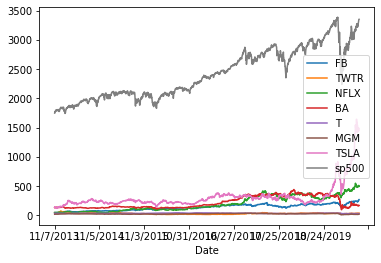

In [ ]:
#plotting Stock 
plot = df.plot()


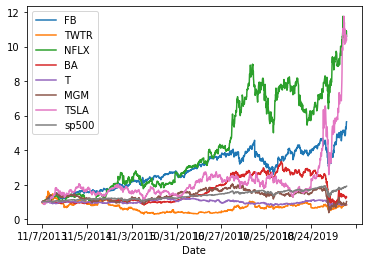

In [ ]:
#plotting normalize 
Normalize(df).plot()


# Develop a function to calculate Daily return

In [ ]:
def Daily_return(df):
  new_df=df.copy()
  for x in df.columns:
    new_df[x]=(new_df[x]-new_df[x].shift(1))/new_df[x].shift(1)*100
  return new_df

In [ ]:
daily_stock_return = Daily_return(df)
daily_stock_return

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
Date,,,,,,,,
11/7/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534
...,...,...,...,...,...,...,...,...
8/3/2020,-0.674101,-0.027481,1.992307,2.702534,0.135230,1.429459,3.790991,0.718102
8/4/2020,-0.845374,-0.109923,2.210104,1.725521,1.316674,2.450974,0.134680,0.361193
8/5/2020,-0.284196,1.210462,-1.477519,5.579446,-0.533156,0.000000,-0.133153,0.642974


In [ ]:
# here we obeserve that 1st row id NA
# we clean it by using dropna method 
daily_stock_return.dropna(inplace=True)
daily_stock_return

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
Date,,,,,,,,
11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534
11/14/2013,0.574837,4.906106,2.174301,1.441765,0.256630,-0.710670,-0.793072,0.483726
...,...,...,...,...,...,...,...,...
8/3/2020,-0.674101,-0.027481,1.992307,2.702534,0.135230,1.429459,3.790991,0.718102
8/4/2020,-0.845374,-0.109923,2.210104,1.725521,1.316674,2.450974,0.134680,0.361193
8/5/2020,-0.284196,1.210462,-1.477519,5.579446,-0.533156,0.000000,-0.133153,0.642974


# calculate beta for tesla stock

In [ ]:
# beta is a concept that measures the expected move in a stock relative to movements in the overall market
# A beta greater than 1.0 suggests that the stock is more volatile than the broader market
# A beta less than 1.0 suggest that the stock with a lower volatility 


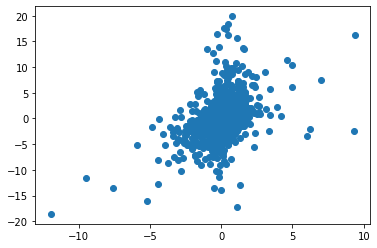

In [ ]:
# plot a scatter plot between selected stock and S&P500
scatter = plt.scatter( x= daily_stock_return['sp500'], y=daily_stock_return['TSLA'])

In [ ]:
beta, alpha = np.polyfit(daily_stock_return['sp500'], daily_stock_return['TSLA'] , 1)
print('beta for {} is {} and alpha is {}'. format('TSLA',beta,alpha))

beta for TSLA is 1.2359694521881228 and alpha is 0.1372429181982097


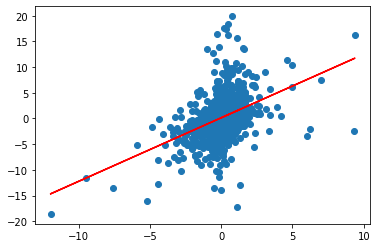

In [ ]:
# now plot straight line on scatter plot of TSLA andsp500
# stright line equation is y = m*x = c
# Here x is sp500 stock_Daily_return and y = beta * sp500 stock_Daily_return + alpha 
# beta = m  and alpha = c

plt.scatter(daily_stock_return['sp500'],daily_stock_return['TSLA'])
plt.plot(daily_stock_return['sp500'],beta*daily_stock_return['sp500']+alpha,'r')
plt.show()

# calculate beta for every stock 


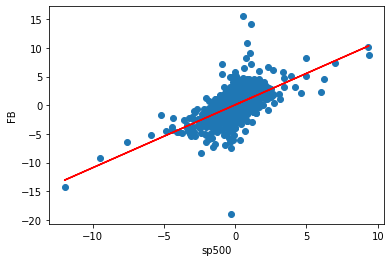

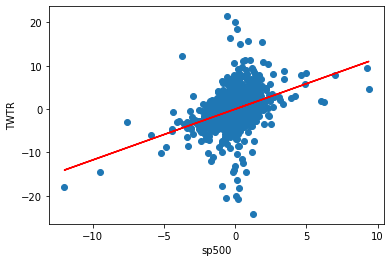

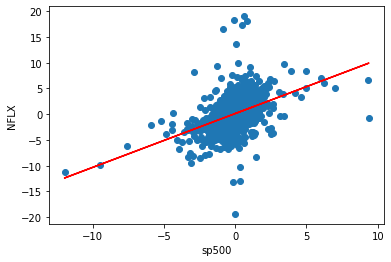

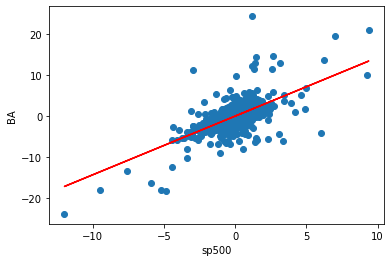

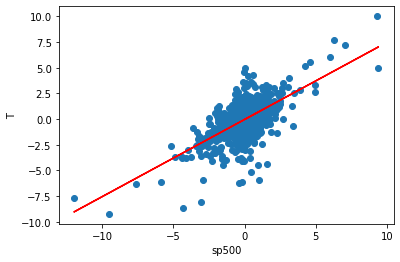

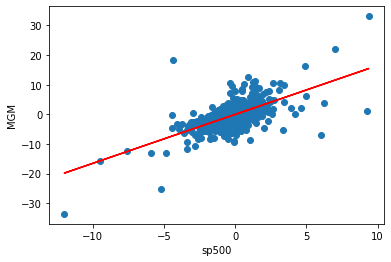

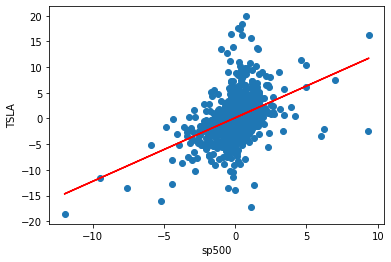

In [ ]:
# create place holfer for beta and alpha 
beta={}
alpha={}
# loop in daily stock return 
for i in daily_stock_return.columns[0:7]:
  # plot individual stock wrt to sp500
  daily_stock_return[0:7].plot(kind = 'scatter',x='sp500',y=i)
  # find beta and alpha for respective stock with respect to sp500
  b,a = np.polyfit(daily_stock_return['sp500'],daily_stock_return[i],1)
   # plot scatter between stock and sp500
  plt.scatter(daily_stock_return['sp500'],daily_stock_return[i])
  # plot line y = b * x + a
  plt.plot(daily_stock_return['sp500'],b*daily_stock_return['sp500']+a,'r')
  plt.show()
  beta[i]=b
  alpha[i]=a





In [ ]:
beta,alpha


({'BA': 1.4304612058887696,
  'FB': 1.0968475266899829,
  'MGM': 1.6517130548552879,
  'NFLX': 1.044569751193794,
  'T': 0.752386908855468,
  'TSLA': 1.2359694521881228,
  'TWTR': 1.172359699994859},
 {'BA': -0.018386146180086528,
  'FB': 0.07368659180650615,
  'MGM': -0.030207583419306586,
  'NFLX': 0.1273008074417144,
  'T': -0.03380955785288104,
  'TSLA': 0.1372429181982097,
  'TWTR': -0.003854813378991553})

#  We can see MGM has highest Beta 

# Done
